# Venn diagram

create Venn diagram showing overlapping mass spectral features selected through hypergeometric testing, univariate correlation analysis and LASSO regression

load libraries

In [14]:
import matplotlib.pyplot as plt
import matplotlib_venn as venn
import pandas as pd

load univariate results

In [3]:
uc = pd.read_csv('../CorrelationAnalysis/KendallsTauCorrelation_GA.txt', sep = '\t')

In [4]:
uc.head(6)

,estimate.cor,p.value,p.value.corrected,cluster id
0,0.148333,0.009337,0.066176,1
1,0.138469,0.015240,0.092898,2
2,0.136383,0.016846,0.098614,3
3,0.130313,0.022390,0.117884,4
4,0.042299,0.458521,0.692645,5
5,0.047421,0.405953,0.651595,6


load LASSO regression results

In [5]:
lr = pd.read_csv('../LASSO/LASSO_coefs.csv', sep = ',')

In [6]:
lr.head(6)

,row ID,Model0_LASSO,Model1_LASSO,Model2_LASSO,Model3_LASSO,Model4_LASSO,Model5_LASSO,Model6_LASSO,Model7_LASSO,Model8_LASSO,Model9_LASSO,mean_LASSO,std_dev_LASSO,zeroes_LASSO
0,33.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.007823,0.950834,2.417834,9
1,57.0,-0.128489,-0.469545,-0.440863,-0.638038,-0.749952,-0.391667,-0.479605,-0.283974,-0.630893,-0.134860,-0.258590,0.447892,0
2,106.0,-0.000000,-0.010783,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.034884,-0.000000,-0.000000,0.842063,2.150435,8
3,200.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.011857,0.950508,2.417963,9
4,214.0,0.029489,0.193793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.863815,2.142512,8
5,328.0,-0.058610,-0.028353,-0.019272,-0.056129,-0.000000,-0.000000,-0.072039,-0.000000,-0.000000,-0.105945,0.395454,1.085801,4


load hypergeometric testing results

In [7]:
hg = pd.read_csv('../HyperGeometricTesting/SignificantFamilies_001.tsv', sep = '\t')

In [8]:
hg.head()

,componentindex_HG_001,clusterindex_HG_001
0,223,23219
1,223,24727
2,223,23153
3,223,22556
4,223,29807


In [9]:
ucsig = set(uc[uc['p.value.corrected'] < 0.05]['cluster id'])

In [10]:
len(ucsig)

744

In [11]:
hgsig = set(hg['clusterindex_HG_001'])

In [12]:
len(hgsig)

230

In [13]:
lassosig = set(lr['row ID'].astype('int'))

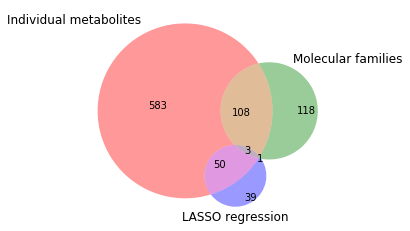

In [15]:
f = plt.figure()
s = {1,2,3,4}
t = {3,5,4,8}
venn.venn3([ucsig,hgsig,lassosig],set_labels=('Individual metabolites','Molecular families','LASSO regression'))
plt.show()

In [16]:
f.savefig("VennDiagram.pdf", bbox_inches='tight')

In [17]:
lassosig & ucsig & hgsig

{33, 539, 635}